Import Library dan Load data dari Google Drive

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
dataku=pd.read_csv("processed.cleveland.data")

Menampilkan data beserta Informasi dan Deskripsi

In [3]:
dataku.info()
dataku.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [4]:
dataku

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Pengecekan Missing Data

In [5]:
np.sum(pd.isnull(dataku).sum())

0

Pengecekan Korelasi Antar Variabel

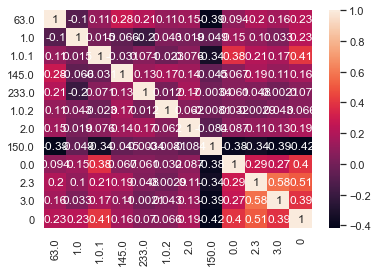

In [6]:
ax = sns.heatmap(dataku.corr(), annot=True)

Membagi dataset (Training set & Testing set)

In [7]:
X = dataku.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values
y = dataku.iloc[:, 13].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Klasifikasi dengan Random Forest

In [9]:
model = RandomForestClassifier(n_estimators=500,random_state=0)

In [13]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: '?'

Evaluasi Model

In [12]:
y_pred = model.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
print(classification_report(y_test, y_pred))

confusion Matriks dan Skor Akurasi

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
KESIMPULAN

Hasil Prediksi
Tidak menderitaa penyakit jantung sebanyak 34 orang
Menderita penyakit jantung sebanyak 24 orang

False Positif, orang yang tidak menderita penyakit jantung tetapi diprediksi menderita penyakit jantung sebanyak 12 orang
False Negatif, orang yang menderita penyakit jantung tetapi diprediksi tidak menderita penyakit jantung sebanyak 6 orang

Akurasi model sebesar 0.7631578947368421